In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd 
from pandas import DataFrame
import math
import numpy as np
from numpy import genfromtxt
import sklearn
from collections import Counter
import sys
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from nltk.corpus import stopwords
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 

## Training data
In the following section, we read data from the files and store it in the training sets.

In [6]:
data=pd.read_csv('/content/drive/My Drive/Assignment-2_Dataset/Datasets/Question-4/weather.csv')
y=data['Apparent Temperature (C)']
data=data.drop(['Apparent Temperature (C)','Formatted Date','Daily Summary'],axis=1)
y=y.to_numpy()
X=data
# X=data.to_numpy()
print(X)
print(y)
# X.shape

             Summary Precip Type  ...  Visibility (km)  Pressure (millibars)
0      Partly Cloudy        rain  ...          15.8263               1015.13
1      Partly Cloudy        rain  ...          15.8263               1015.63
2      Mostly Cloudy        rain  ...          14.9569               1015.94
3      Partly Cloudy        rain  ...          15.8263               1016.41
4      Mostly Cloudy        rain  ...          15.8263               1016.51
...              ...         ...  ...              ...                   ...
77280  Partly Cloudy        rain  ...          16.1000               1014.07
77281  Partly Cloudy        rain  ...          16.1000               1014.36
77282  Partly Cloudy        rain  ...          15.5526               1015.16
77283  Partly Cloudy        rain  ...          16.1000               1015.66
77284  Partly Cloudy        rain  ...          16.1000               1015.95

[77285 rows x 8 columns]
[ 7.38888889  7.22777778  9.37777778 ... 24.583333

### We perform one hot encoding on the categorical features of the data.

In [8]:
dummy = pd.get_dummies(X)
dummy.shape
X=dummy.to_numpy()
X

array([[ 9.47222222,  0.89      , 14.1197    , ...,  0.        ,
         1.        ,  0.        ],
       [ 9.35555556,  0.86      , 14.2646    , ...,  0.        ,
         1.        ,  0.        ],
       [ 9.37777778,  0.89      ,  3.9284    , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [24.58333333,  0.48      , 10.0947    , ...,  0.        ,
         1.        ,  0.        ],
       [22.03888889,  0.56      ,  8.9838    , ...,  0.        ,
         1.        ,  0.        ],
       [21.52222222,  0.6       , 10.5294    , ...,  0.        ,
         1.        ,  0.        ]])

### We scale the data down using MinMax scaler of scikit-learn.

In [9]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
print(X)
print(X.shape)

[[0.50697507 0.89       0.2211296  ... 0.         1.         0.        ]
 [0.50508505 0.86       0.22339889 ... 0.         1.         0.        ]
 [0.50544505 0.89       0.06152295 ... 0.         1.         0.        ]
 ...
 [0.75177752 0.48       0.1580938  ... 0.         1.         0.        ]
 [0.71055711 0.56       0.14069592 ... 0.         1.         0.        ]
 [0.70218702 0.6        0.16490166 ... 0.         1.         0.        ]]
(77285, 34)


### In the below section, we split the training data into train and test sets. Then we append a column of ones to the training set and initialize theta with random values.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print(X_train.shape)
ones = np.ones([X_train.shape[0],1])
X_train = np.concatenate((ones,X_train),axis=1)
print(X_train.shape)
print(X_test.shape)
ones = np.ones([X_test.shape[0],1])
X_test = np.concatenate((ones,X_test),axis=1)
print(X_test.shape)
np.random.seed(10)
theta = np.random.rand(X_train.shape[1])
print(y_train.shape)

(61828, 34)
(61828, 35)
(15457, 34)
(15457, 35)
(61828,)


In [0]:
no_of_iterations = 10000

# Gradient Descent
In this section we write the method for the gradient descent algorithm. We have taken number of iterations as 10000 and run the gradient descent algorithm for that many iterations. 

In [0]:
def gradient_descent(X_train, y_train, theta, alpha):
    predictions = list()
    cost_list = list()
    cost_list.append(1e10)
    i = 0 
    m=len(y_train)
    while i<=no_of_iterations:
        temp = np.dot(X_train, theta)
        error = temp - y_train
        predictions.append(temp)
        cost = 1/(2*m) * np.dot(error.T, error)
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(X_train.T, error))
        i = i + 1
        # if(cost_list[no_of_iterations-1]-cost_list[no_of_iterations] < 1e-9):
        #     break

    cost_list.pop(0)
    return predictions, cost_list, theta

### We call the gradient descent function and get back the returned final cost and regression coefficients.

In [19]:
print(X_train.shape)
print(y_train.shape)
print(theta.shape)
alpha = 0.1
prediction_list, cost_list, theta = gradient_descent(X_train, y_train, theta, alpha)
# theta = theta_list[-1]
# print(len(theta_list))
# print(theta.shape)
yp=np.dot(X_test,theta)

(61828, 35)
(61828,)
(35,)


## Result
The r2 score is calculated and found out to be **0.989**

In [20]:
r2_score(y_test,yp)

0.9898468034472834

## Graph plot 
The graph shown below depicts how the cost decreases as the number of iterations of gradient descent increases.

Text(0, 0.5, 'Cost')

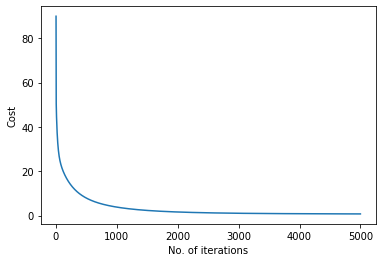

In [23]:
cost = list(cost_list)
cost = cost[:5000]
n_iterations = [x for x in range(1,no_of_iterations+1)]
n_iterations = n_iterations[:5000]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')